In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import random
import networkx as nx
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from gensim.models import Word2Vec


# Dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]



Processing...
Done!


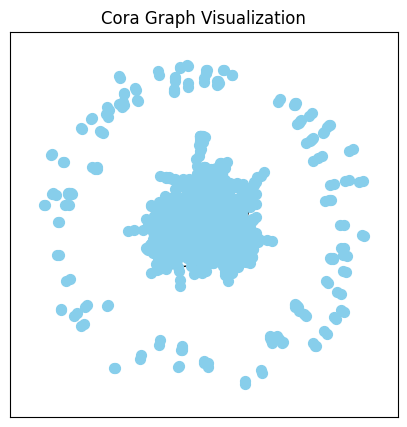

In [14]:
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph = nx.from_edgelist(edges, create_using=nx.Graph())

# 그래프 그리기
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx(graph, pos, with_labels=False, node_size=50, node_color="skyblue")
plt.title("Cora Graph Visualization")
plt.show()

In [6]:
# Random Walk
def random_walk(graph, start_node, walk_length):
  walks = [start_node]
  for walk in range(walk_length - 1):
    # walks에 들어간 마지막 node의 이웃들
    neighbor_nodes = list(graph.neighbors(walks[walk]))
    # neighbor가 없다면 break
    if len(neighbor_nodes) == 0:
      break
    neighbor_node = random.choice(neighbor_nodes)
    walks.append(neighbor_node)
  return walks



In [9]:
import tensorflow as tf
gpu_devices = tf.config.list_physical_devices('GPU')
if not gpu_devices:
    print("GPU is not available.")
else:
    # Limit GPU memory growth (optional but recommended)
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print("GPU is available.")

GPU is available.


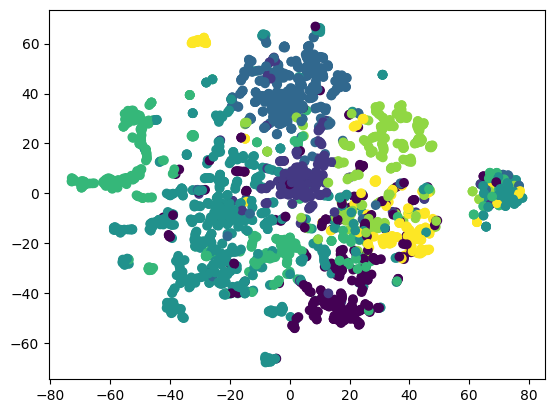

In [13]:
# Deep_Walk 생성
deep_walks = []
walk_per_node = 80
walk_length = 10

for node in range(data.num_nodes):
  for walk in range(walk_per_node):
    deep_walks.append(random_walk(graph, node, walk_length))

# walk -> string 변환
walks_str = [[str(node) for node in walk] for walk in deep_walks]

# walks_str를 문장처럼 Word2Vec으로 학습
model = Word2Vec(walks_str, vector_size=128, window=10, min_count=0, hs=1, negative = 0, sg=1, workers=4, epochs=10)

# Word2Vec학습 결과에서 node embedding 가져오기 + T-sne 그리기
embeddings = np.array([model.wv.get_vector(str(i)) for i in range(data.num_nodes)])

embeddings_2d = TSNE(n_components=2).fit_transform(embeddings)
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=data.y)
plt.show()